# Importing the Libraries

In [52]:
import numpy as np
import pandas as pd

# Loading Dataset

In [53]:
df = pd.read_csv('data/data.csv')

In [54]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [55]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Convert Date column **object** to **datetime** 

In [57]:
df['Date'] = pd.to_datetime(df['Date'])

In [58]:
df['Time'] = pd.to_datetime(df['Time'])

D:\Temp\ipykernel_17404\2145562215.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


### Add the **Hour** column in df

In [59]:
df['Hour'] = (df['Time']).dt.hour

In [60]:
df['Month'] = (df['Date']).dt.month
df['Year'] = (df['Date']).dt.year
df['Day'] = (df['Date']).dt.day

In [61]:
df.drop(columns=['Time', 'Date'], inplace=True)

In [62]:
df.shape

(1000, 19)

In [63]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating', 'Hour',
       'Month', 'Year', 'Day'],
      dtype='object')

In [64]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Hour                       0
Month                      0
Year                       0
Day                        0
dtype: int64

In [65]:
df.isna().any()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
Hour                       False
Month                      False
Year                       False
Day                        False
dtype: bool

In [66]:
numerical = []
categorical = []

for i in df.columns:
    if df[i].dtype == 'object':
        categorical.append(i)
    else:
        numerical.append(i)

# Exploratory Data Analysis

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

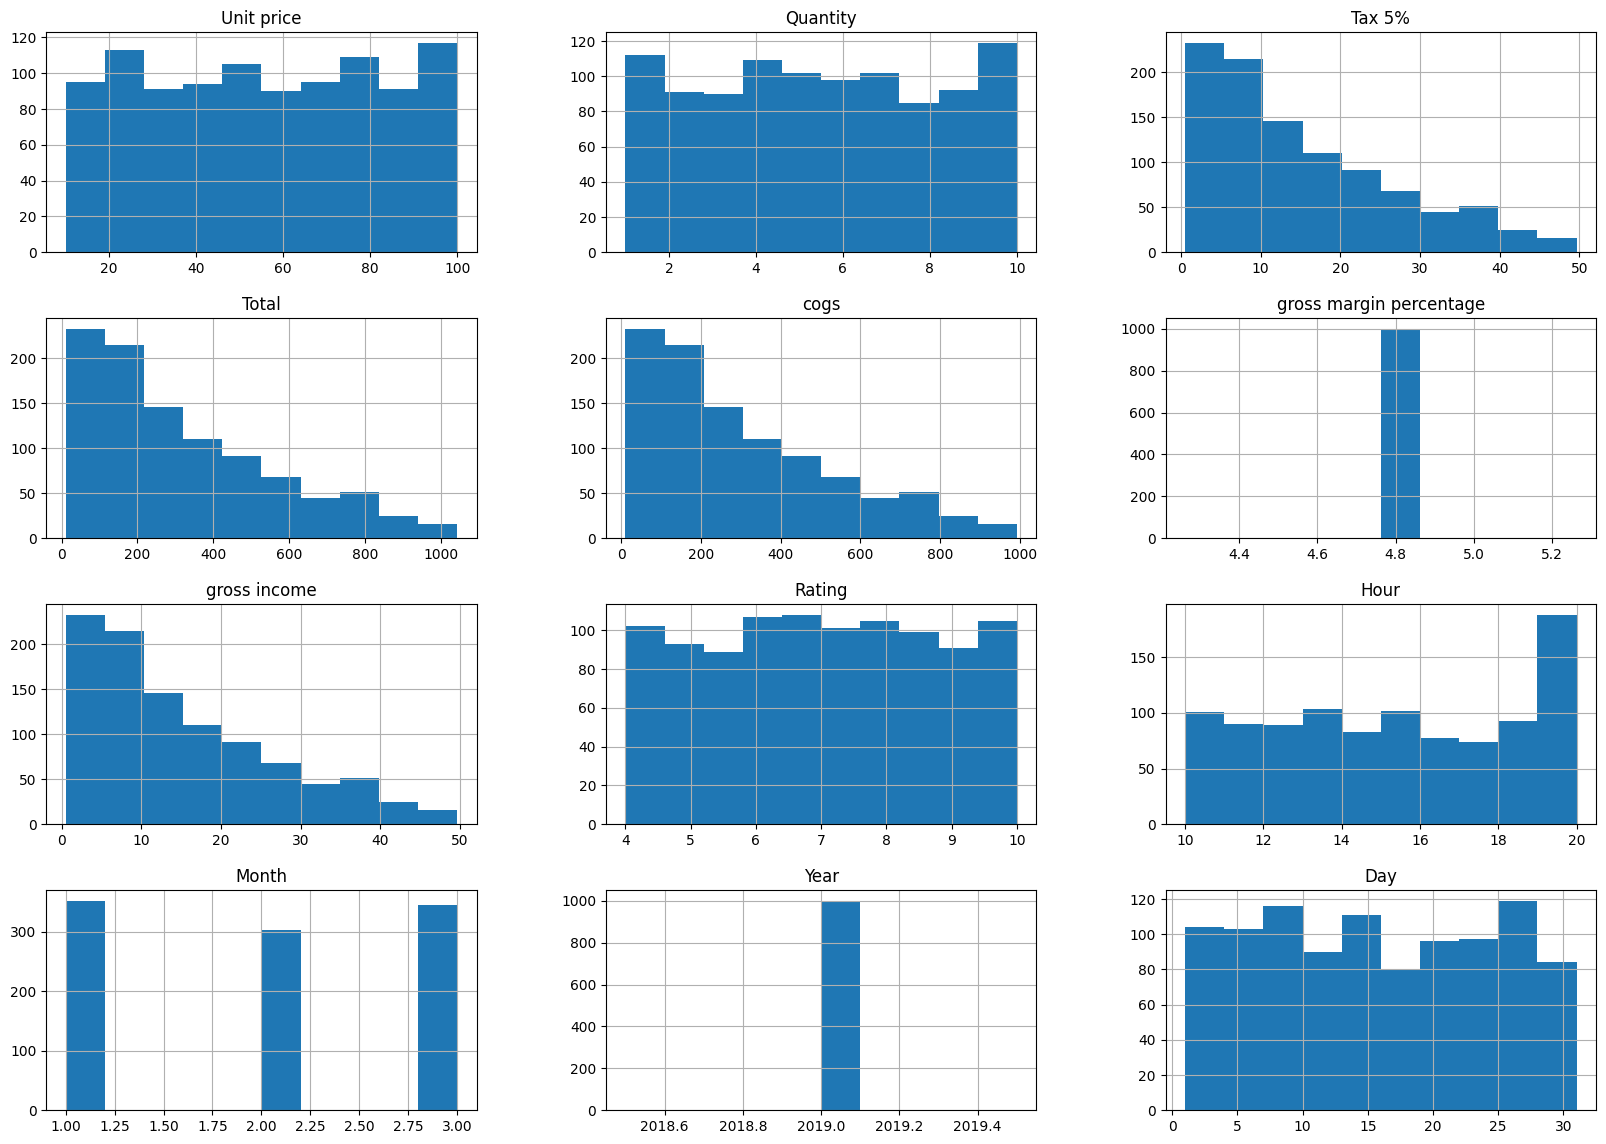

In [68]:

df.hist(figsize=(20,14))
plt.show()

In [69]:
df[numerical].corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Hour,Month,Year,Day
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,0.008242,-0.027387,NaN,0.057021
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,-0.007317,-0.014524,NaN,-0.043347
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002770,-0.022301,NaN,-0.002515
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002770,-0.022301,NaN,-0.002515
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002770,-0.022301,NaN,-0.002515
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002770,-0.022301,NaN,-0.002515
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.030588,-0.042880,NaN,-0.007076
Hour,0.008242,-0.007317,-0.002770,-0.002770,-0.002770,NaN,-0.002770,-0.030588,1.000000,0.043762,NaN,0.020668
Month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,NaN,-0.022301,-0.042880,0.043762,1.000000,NaN,-0.118996


<Axes: >

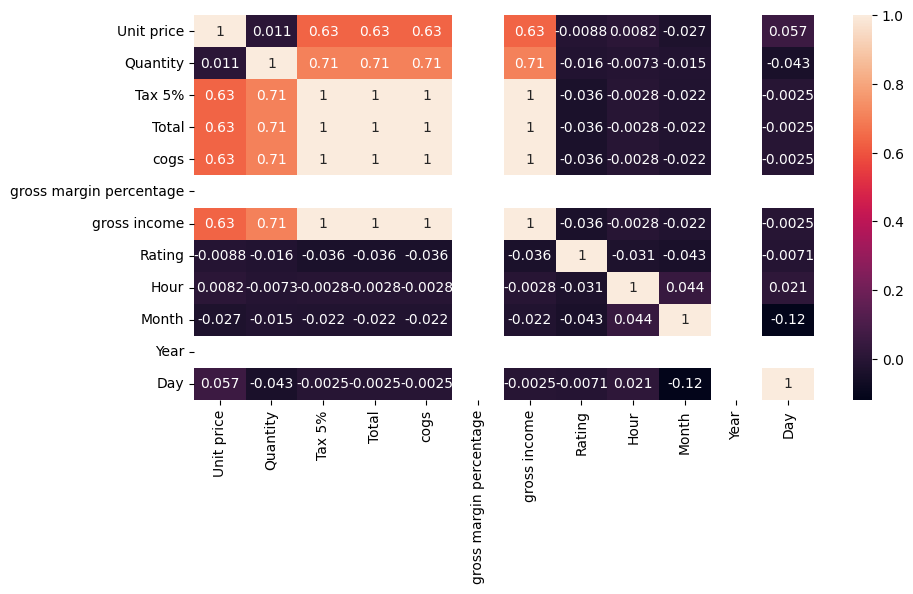

In [70]:
plt.figure(figsize=(10,5))

sns.heatmap(df[numerical].corr(),annot=True)

<Axes: xlabel='Gender', ylabel='count'>

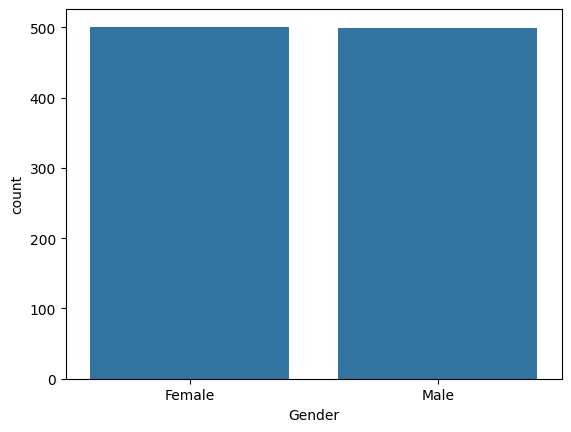

In [71]:
sns.countplot(x='Gender',data=df)

D:\Temp\ipykernel_17404\3414203832.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Branch', y='Rating' , data=df, palette='pastel')


<Axes: xlabel='Branch', ylabel='Rating'>

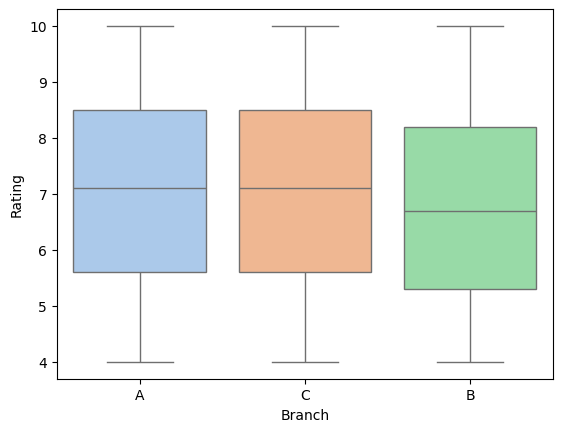

In [72]:
sns.boxplot(x = 'Branch', y='Rating' , data=df, palette='pastel')

<Axes: xlabel='Hour', ylabel='Quantity'>

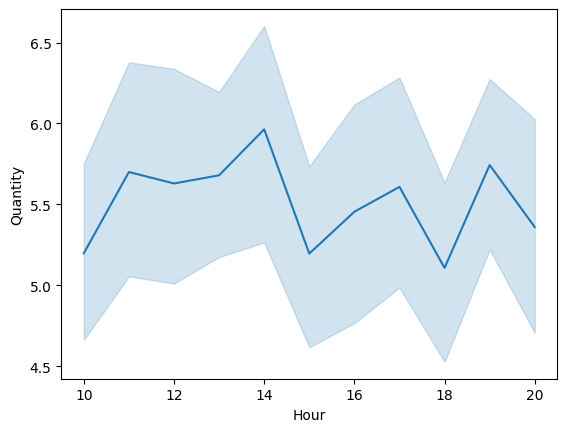

In [73]:
sns.lineplot(x = 'Hour', y='Quantity' , data=df)

D:\Temp\ipykernel_17404\2277873902.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = 'Product line', x='Quantity' , data=df, palette='pastel')


<Axes: xlabel='Quantity', ylabel='Product line'>

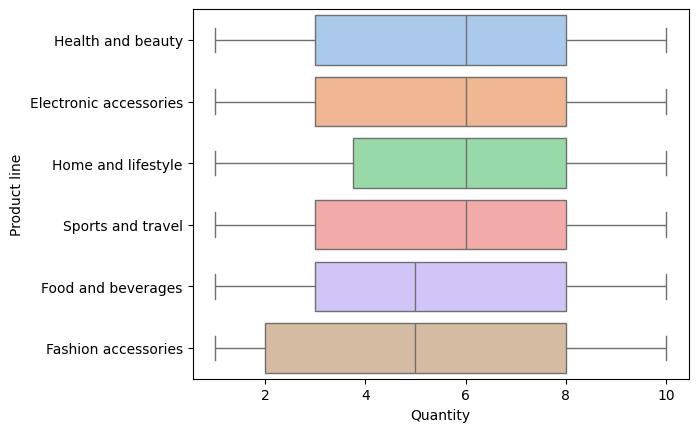

In [74]:
sns.boxplot(y = 'Product line', x='Quantity' , data=df, palette='pastel')

D:\Temp\ipykernel_17404\454440397.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = 'Product line', data=df, palette='pastel')


<Axes: xlabel='count', ylabel='Product line'>

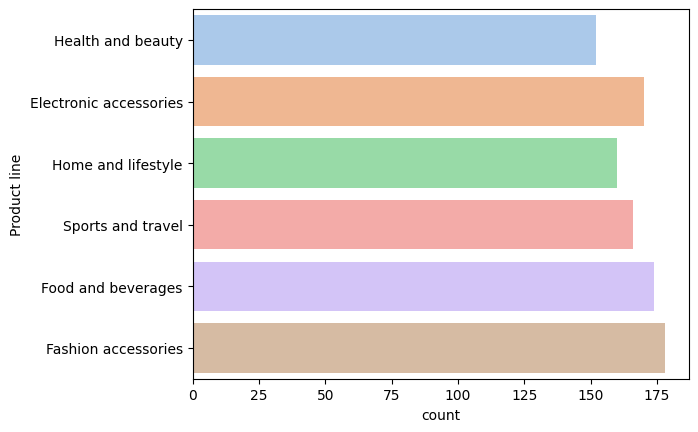

In [75]:
sns.countplot(y = 'Product line', data=df, palette='pastel')

D:\Temp\ipykernel_17404\3440739628.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Payment' , data=df, palette='pastel')


<Axes: xlabel='Payment', ylabel='count'>

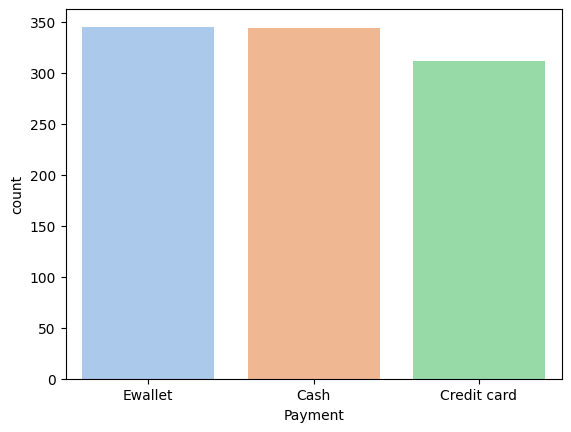

In [76]:
sns.countplot(x = 'Payment' , data=df, palette='pastel')

### Payment from Branch

<Axes: xlabel='Payment', ylabel='count'>

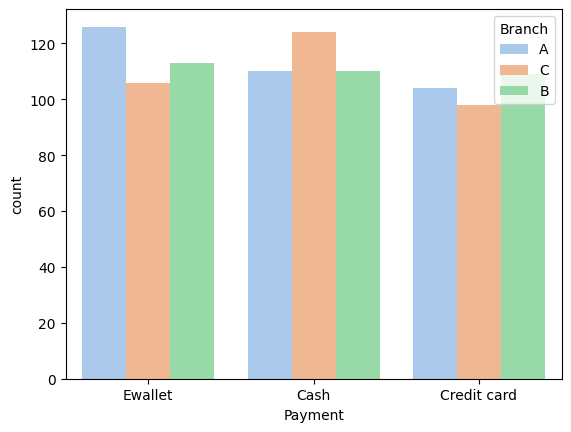

In [77]:
sns.countplot(x = 'Payment' , hue = 'Branch' , data = df, palette='pastel')

### Customer Analysis

In [78]:
df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

D:\Temp\ipykernel_17404\4124202194.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Customer type' , data=df, palette='pastel')


<Axes: xlabel='Customer type', ylabel='count'>

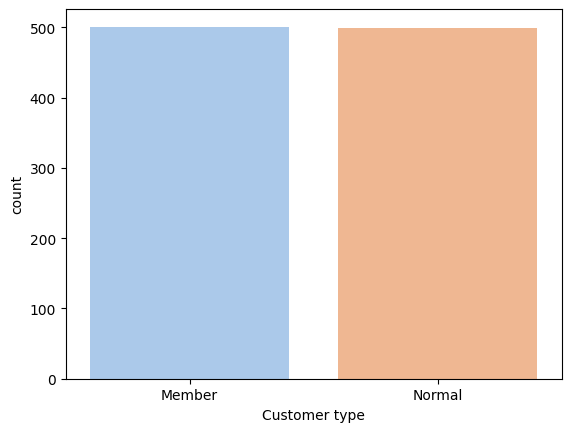

In [79]:
sns.countplot(x = 'Customer type' , data=df, palette='pastel')

Text(0.5, 1.0, 'Customer Type by Branch')

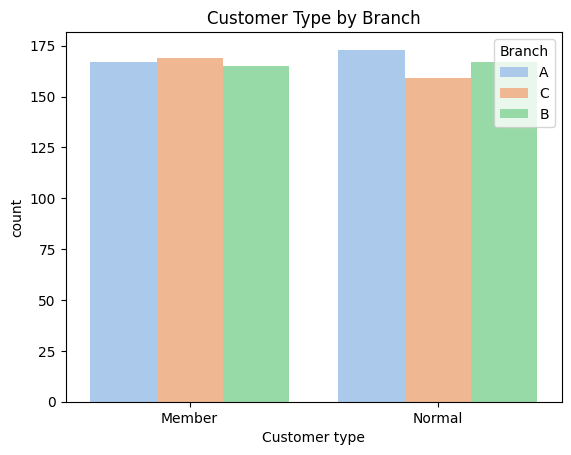

In [80]:
 sns.countplot(x="Customer type", hue = "Branch", data = df , palette = 'pastel').set_title("Customer Type by Branch")

In [81]:
df.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


### **Rating** vs **Unit Price**

D:\Temp\ipykernel_17404\3660594673.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Rating' , y = 'Unit price', data = df[170:180], palette='pastel')


<Axes: xlabel='Rating', ylabel='Unit price'>

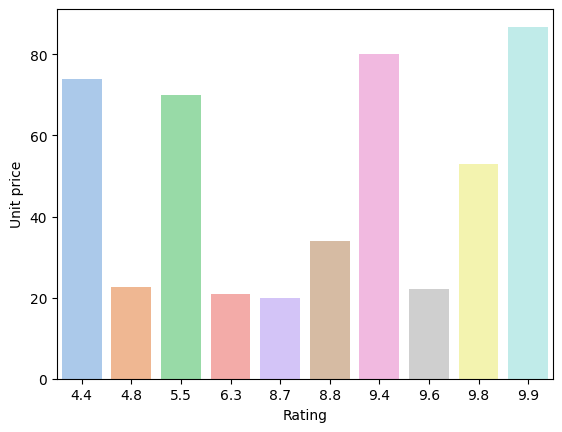

In [82]:
sns.barplot(x = 'Rating' , y = 'Unit price', data = df[170:180], palette='pastel')

In [83]:
df.sample(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Month,Year,Day
24,549-59-1358,A,Yangon,Member,Male,Sports and travel,88.63,3,13.2945,279.1845,Ewallet,265.89,4.761905,13.2945,6.0,17,3,2019,2
175,827-26-2100,A,Yangon,Member,Male,Home and lifestyle,33.84,9,15.2280,319.7880,Ewallet,304.56,4.761905,15.2280,8.8,16,3,2019,21
270,783-09-1637,B,Mandalay,Normal,Female,Sports and travel,67.43,5,16.8575,354.0075,Ewallet,337.15,4.761905,16.8575,6.3,18,3,2019,6


D:\Temp\ipykernel_17404\372444131.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['Quantity'].value_counts(), palette='pastel')


Text(0.5, 1.0, 'Quantity Distribution')

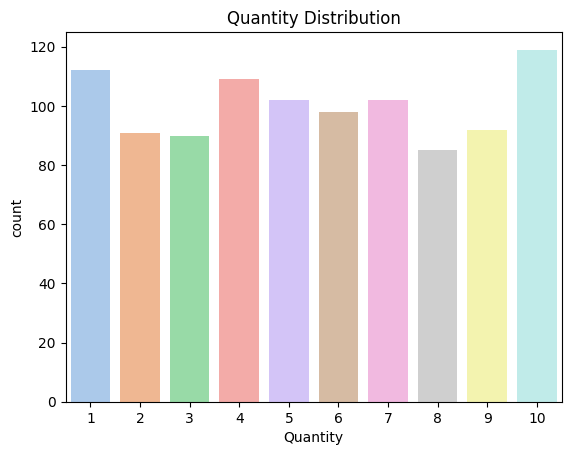

In [84]:
sns.barplot(df['Quantity'].value_counts(), palette='pastel')
plt.title('Quantity Distribution')

### **Rating** vs **Gender**

D:\Temp\ipykernel_17404\1821172872.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Rating', y = 'Gender' , data = df[170:180], palette='pastel')


<Axes: xlabel='Rating', ylabel='Gender'>

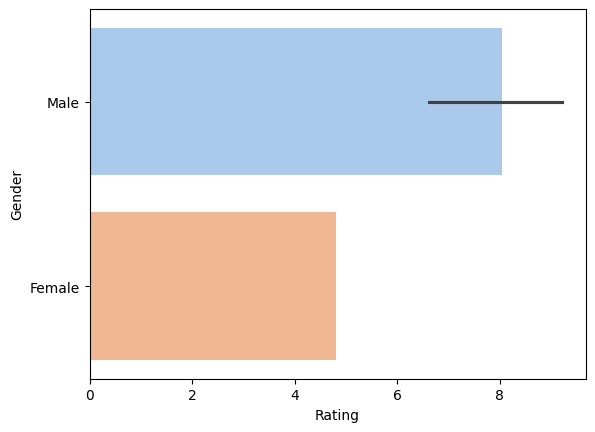

In [85]:
sns.barplot(x = 'Rating', y = 'Gender' , data = df[170:180], palette='pastel')

## Perform the **Encoding** in Categorical Column

In [86]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [87]:
for i in categorical:
    df[i] = le.fit_transform(df[i])

In [88]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Month,Year,Day
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1,13,1,2019,5
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6,10,3,2019,8
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4,13,3,2019,3
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,2,465.76,4.761905,23.2880,8.4,20,1,2019,27
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3,10,2,2019,8


### Here Skew data is here so we perfom the **FunctionTransformation**

D:\Temp\ipykernel_17404\3023179678.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Tax 5%'], kde=True, palette='pastel')


<Axes: xlabel='Tax 5%', ylabel='Count'>

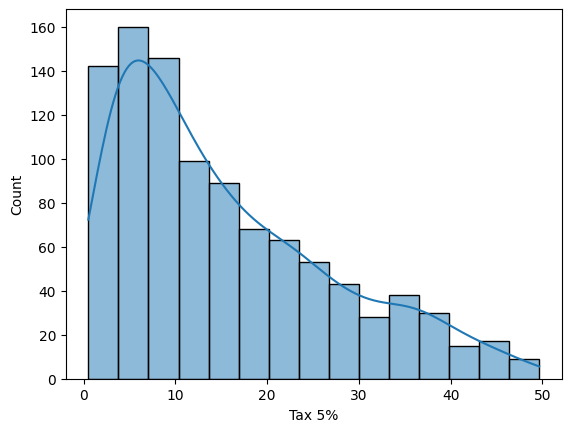

In [89]:
sns.histplot(df['Tax 5%'], kde=True, palette='pastel')

D:\Temp\ipykernel_17404\941751866.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Total'], kde=True, palette='pastel')


<Axes: xlabel='Total', ylabel='Count'>

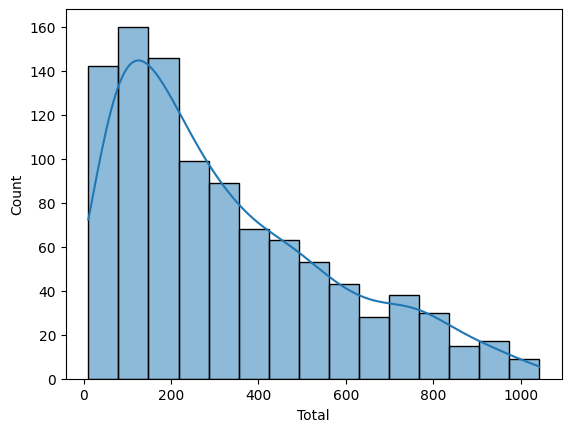

In [90]:
sns.histplot(df['Total'], kde=True, palette='pastel')

In [91]:
# from sklearn.preprocessing import FunctionTransformer

# ft = FunctionTransformer(func= np.log1p, validate=True)

In [92]:
# df['Tax 5%'] = ft.fit_transform(df[['Tax 5%']])
# df['Total'] = ft.fit_transform(df[['Total']])
# df['cogs'] = ft.fit_transform(df[['cogs']])
# df['gross income'] = ft.fit_transform(df[['gross income']])

### **Training** and **Testing** Data

In [93]:
df.sample(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Month,Year,Day
173,633,1,0,0,1,0,52.89,6,15.867,333.207,1,317.34,4.761905,15.867,9.8,17,1,2019,19
410,175,1,0,1,0,3,34.21,10,17.105,359.205,0,342.10,4.761905,17.105,5.1,13,1,2019,2


# **MODELS**

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor


In [95]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Quantity' in numerical_features:
    numerical_features.remove('Quantity')

In [96]:
X = df[numerical_features]
y = df['Quantity']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [104]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_r2 = np.mean(cv_scores)
    
    return {
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'CV R²': cv_r2,
        'Predictions': y_pred,
        'Model Object': model
    }

In [105]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'K-Neighbors': KNeighborsRegressor(n_neighbors=5)
}

In [106]:
results = []
predictions = {}

In [107]:
for name, model in models.items():
    try:
        print(f"Training {name} to predict Quantity...")
        result = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)
        results.append(result)
        predictions[name] = result['Predictions']
        print(f"Completed {name} with R² of {result['R²']:.4f}")
    except Exception as e:
        print(f"Error with {name}: {str(e)}")

Training Linear Regression to predict Quantity...
Completed Linear Regression with R² of 0.8230
Training Ridge Regression to predict Quantity...
Completed Ridge Regression with R² of 0.8231
Training Decision Tree to predict Quantity...
Completed Decision Tree with R² of 0.9756
Training Random Forest to predict Quantity...
Completed Random Forest with R² of 0.9917
Training Gradient Boosting to predict Quantity...
Completed Gradient Boosting with R² of 0.9887
Training XGBoost to predict Quantity...
Completed XGBoost with R² of 0.9934
Training K-Neighbors to predict Quantity...
Completed K-Neighbors with R² of 0.6622


In [108]:
results_df = pd.DataFrame(results)
results_df = results_df.drop(['Predictions', 'Model Object'], axis=1)
results_df = results_df.sort_values('R²', ascending=False)

In [109]:
print("\n=== Model Performance Comparison for Quantity Prediction ===")
print(results_df.to_string(index=False))


=== Model Performance Comparison for Quantity Prediction ===
            Model     RMSE      MAE       R²    CV R²
          XGBoost 0.226639 0.140573 0.993413 0.990079
    Random Forest 0.253888 0.165600 0.991734 0.987947
Gradient Boosting 0.297500 0.216193 0.988650 0.986581
    Decision Tree 0.435890 0.180000 0.975635 0.957956
 Ridge Regression 1.174535 0.832933 0.823091 0.805434
Linear Regression 1.174899 0.833367 0.822981 0.805418
      K-Neighbors 1.622960 1.298000 0.662220 0.551281


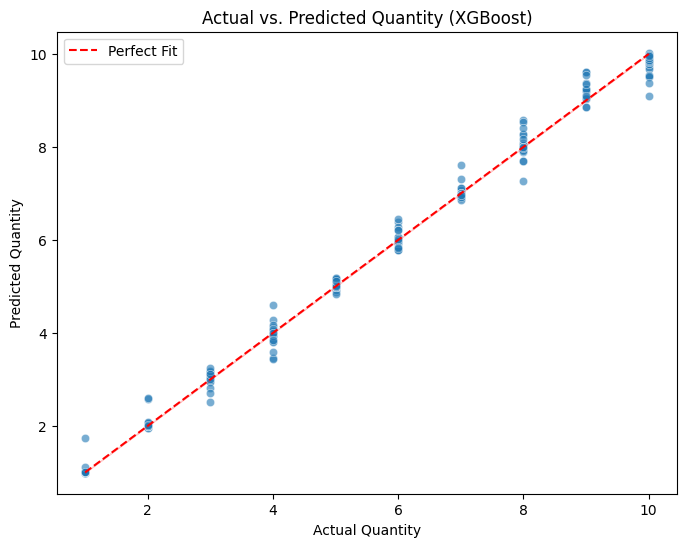

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the best-performing model
best_model_name = results_df_sorted.iloc[0]["Model"]
best_model = models[best_model_name]

# Generate predictions using the best model
y_pred_best = best_model.predict(X_test_scaled)

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color="red", linestyle="--", label="Perfect Fit")

# Labels and title
plt.xlabel("Actual Quantity")
plt.ylabel("Predicted Quantity")
plt.title(f"Actual vs. Predicted Quantity ({best_model_name})")
plt.legend()
plt.show()


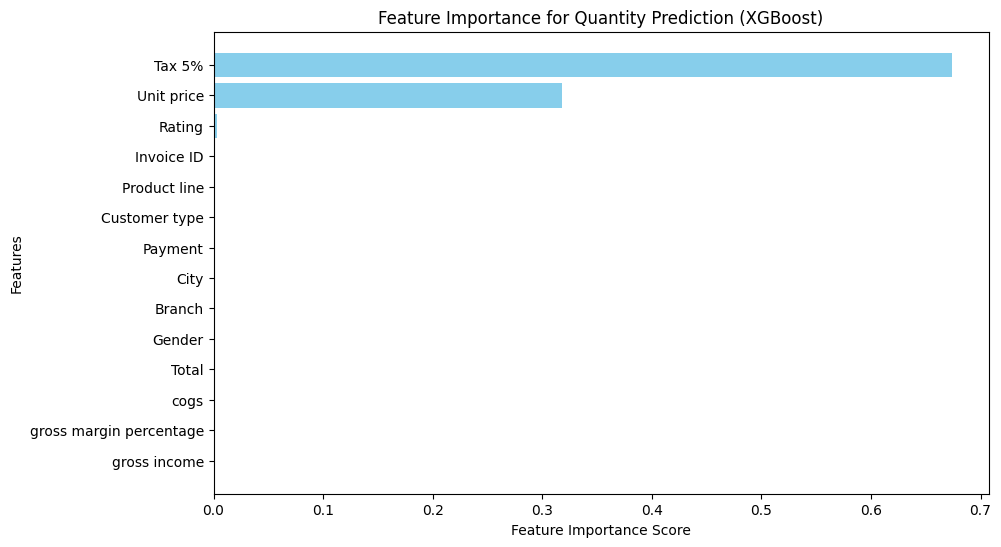

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the trained XGBoost model
feature_importance = models['XGBoost'].feature_importances_
feature_names = X.columns  # Assuming X contains feature names

# Sort feature importance values in descending order
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_idx]
sorted_features = [feature_names[i] for i in sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Quantity Prediction (XGBoost)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


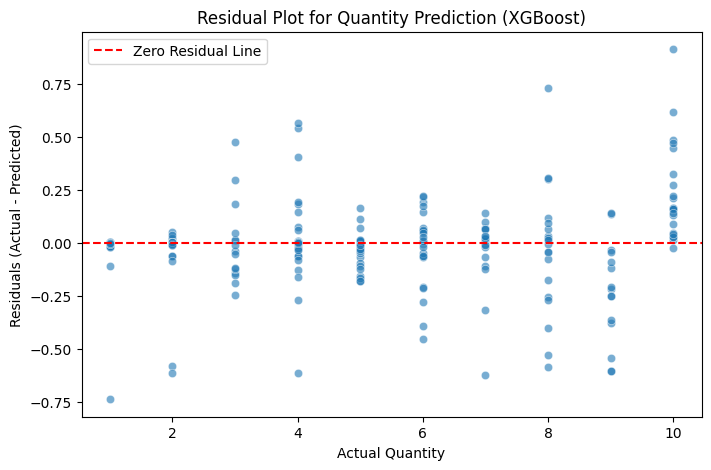

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals
residuals = y_test - predictions['XGBoost']

# Create residual plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', label="Zero Residual Line")
plt.xlabel("Actual Quantity")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for Quantity Prediction (XGBoost)")
plt.legend()
plt.show()


<Figure size 800x600 with 0 Axes>

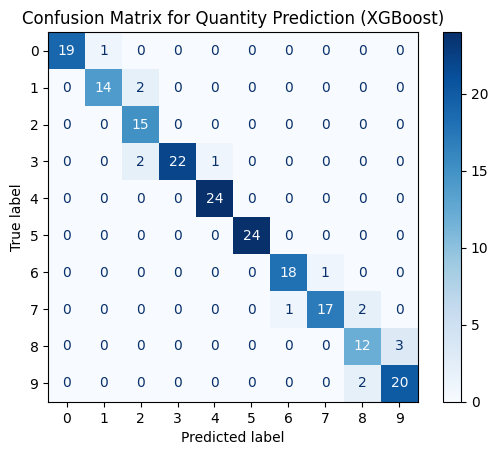

In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Convert actual and predicted continuous values into bins (e.g., rounding to nearest integer)
y_actual_bins = np.round(y_test).astype(int)
y_pred_bins = np.round(predictions['XGBoost']).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_actual_bins, y_pred_bins)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Quantity Prediction (XGBoost)")
plt.show()
